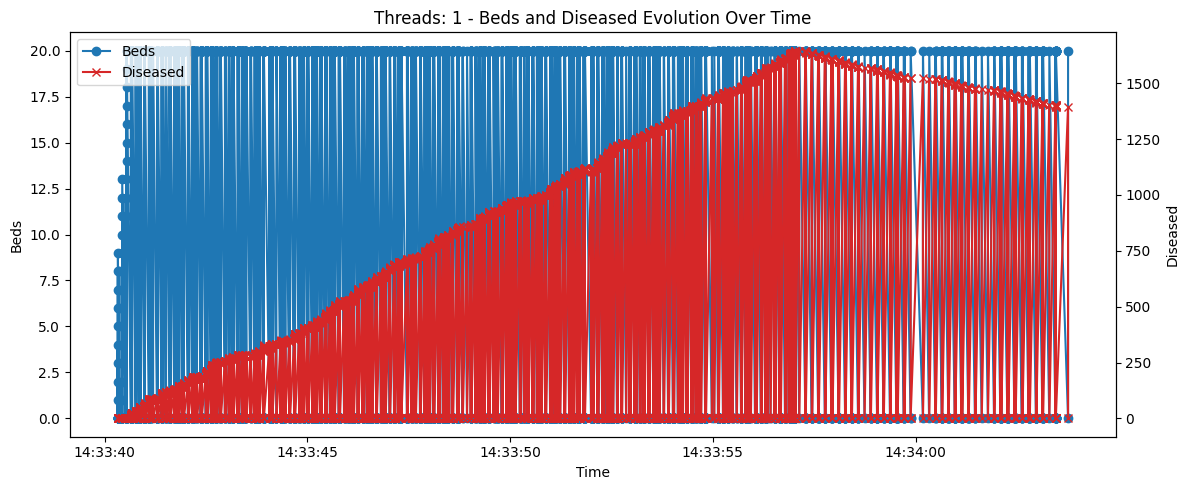

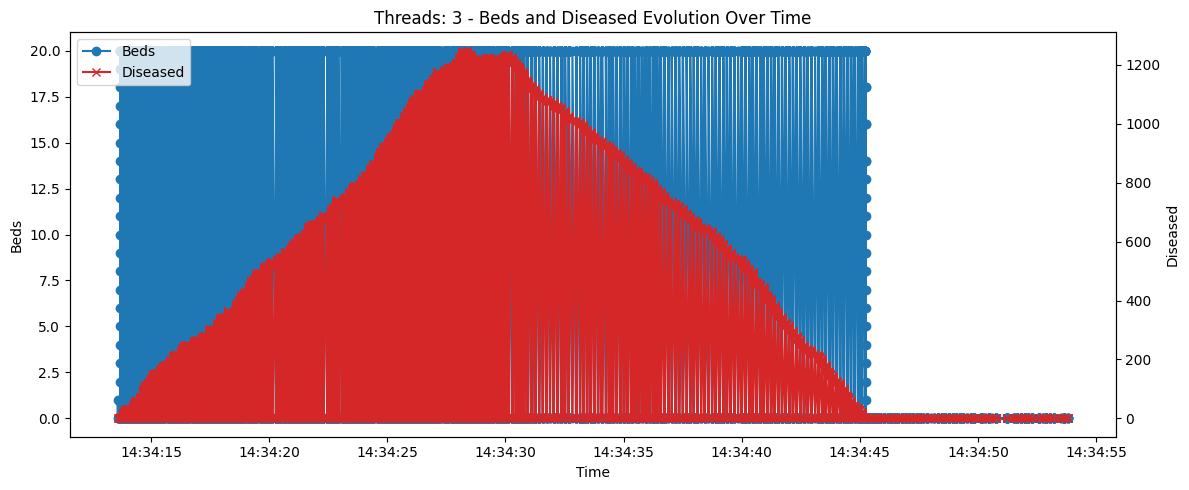

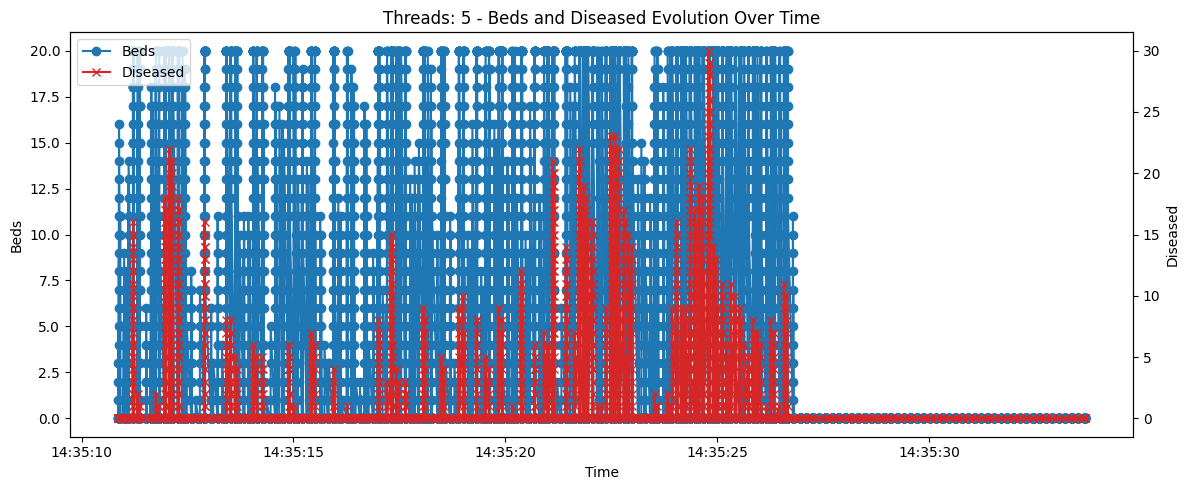

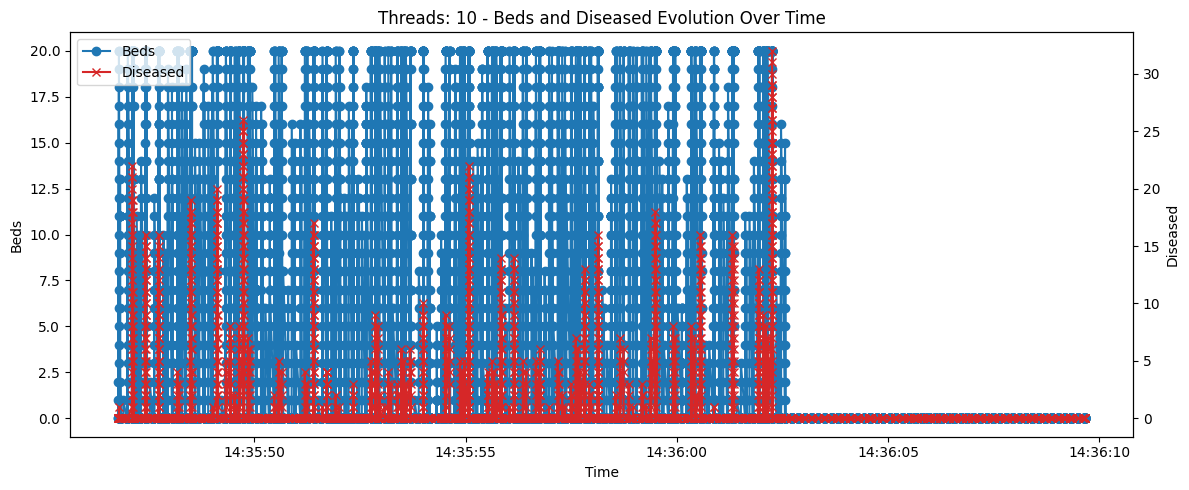

In [35]:
import re

import matplotlib.pyplot as plt
import pandas as pd

for threads in [1, 3, 5, 10]:
    LOG_FILE = "hospital_" + str(threads) + ".log"

    df = pd.read_csv(
        LOG_FILE,
        sep=",",
        quotechar="'",
        names=["timestamp", "thread", "message"],
        parse_dates=["timestamp"],
    )

    def count_patients(msg, key):
        pattern = f"{key}:\s*\[(.*?)\]"
        match = re.search(pattern, msg)
        if match:
            patients = match.group(1).split(",")
            patients = [p.strip() for p in patients if p.strip()]
            return len(patients)
        return 0

    df["beds_count"] = df["message"].apply(lambda m: count_patients(m, "Beds"))
    df["diseased_count"] = df["message"].apply(lambda m: count_patients(m, "Diseased"))

    # Fill forward missing counts
    df["beds_count"] = df["beds_count"].ffill().fillna(0)
    df["diseased_count"] = df["diseased_count"].ffill().fillna(0)

    fig, ax1 = plt.subplots(figsize=(12, 5))

    color1 = "tab:blue"
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Beds")
    ax1.plot(df["timestamp"], df["beds_count"], color=color1, marker="o", label="Beds")
    ax1.tick_params(axis="y")

    # Secondary y-axis for Diseased
    ax2 = ax1.twinx()
    color2 = "tab:red"
    ax2.set_ylabel("Diseased")
    ax2.plot(
        df["timestamp"],
        df["diseased_count"],
        color=color2,
        marker="x",
        label="Diseased",
    )
    ax2.tick_params(axis="y")

    # Add title and legend
    plt.title("Threads: " + str(threads) + " - Beds and Diseased Evolution Over Time")
    fig.tight_layout()
    plt.xticks(rotation=45)

    # Optional: combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="upper left")

    plt.show()
